In [1]:
import requests
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams

In [2]:
companies = ['MSFT','AAPL','AMZN','GOOGL','GOOG','FB','INTC','CSCO','CMCSA','PEP','NFLX','ADBE','PYPL','AMGN','AVGO','NVDA','COST','TXN','TFCFA','TFCF','SBUX','GILD','CHTR','BKNG','QQQ','FOX','MDLZ','QCOM','ADP','INTU','ISRG','BIIB','CELG','TMUS','CSX','WBA','CME','AMOV','BIDU','TSLA','ILMN','VRTX','MU','REGN','MAR','AABA','CTSH','FOXA','ADI']
api_key='i5w7t03wq2rNRsY8Ua4Z9R9O-EuUOKsw'

## Ownership Structure for Top Institutional Holders

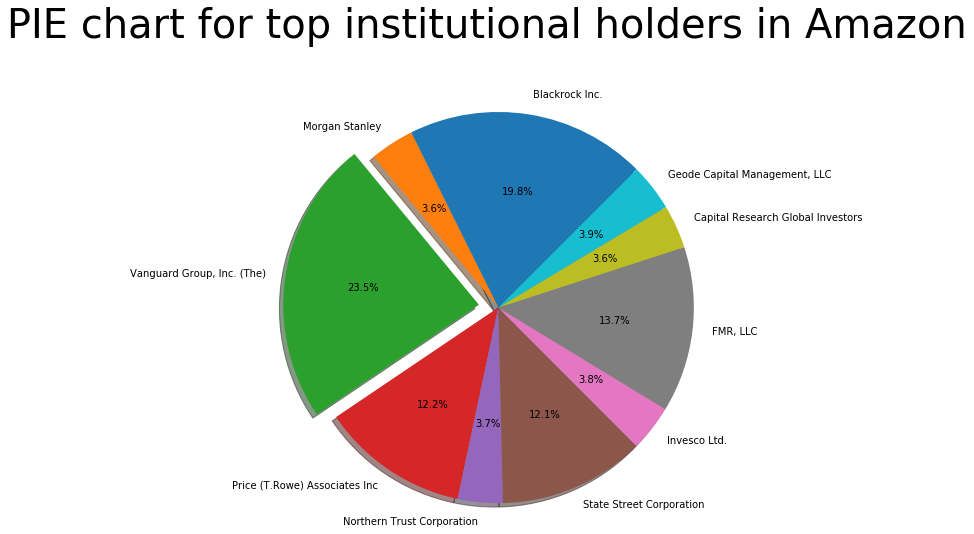

In [10]:
response = requests.get('https://api.unibit.ai/ownership/AMZN?ownership_type=top_institutional_holder&AccessKey='+api_key)
ownstruct = response.json()
holder={}
for owner in ownstruct['top_institutional_holder']:
    holder[owner['Holder']] = owner['% Out']
    
holder_name=()
percentage=[]
i=0
for key,value in holder.items():
    holder_name=holder_name+(key,)
    percentage.append(float(value.replace('%', '')))
    
normalized = [round(float(i)/sum(percentage)*100,2) for i in percentage]

rcParams['axes.titlepad'] = 50 

plt.figure(figsize=(8,8))
explode = (0, 0, 0.1, 0, 0, 0, 0, 0, 0, 0) 


plt.pie(normalized, explode=explode, labels=holder_name, autopct='%1.1f%%',
        shadow=True, startangle=45)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('PIE chart for top institutional holders in Amazon',fontsize=40)
plt.show()

## Realtime Stock Price

In [4]:
name=[]
price=[]
for ticker in companies:
    response = requests.get('https://api.unibit.ai/realtimestock/'+ticker+'?AccessKey='+api_key)
    if(response):
        data = response.json()
        name.append(ticker)
        price.append(data[0]['price'])
year = data[0]['date'][:4]
day = data[0]['date'][4:6]
month = data[0]['date'][6:8]
time = data[0]['minute']

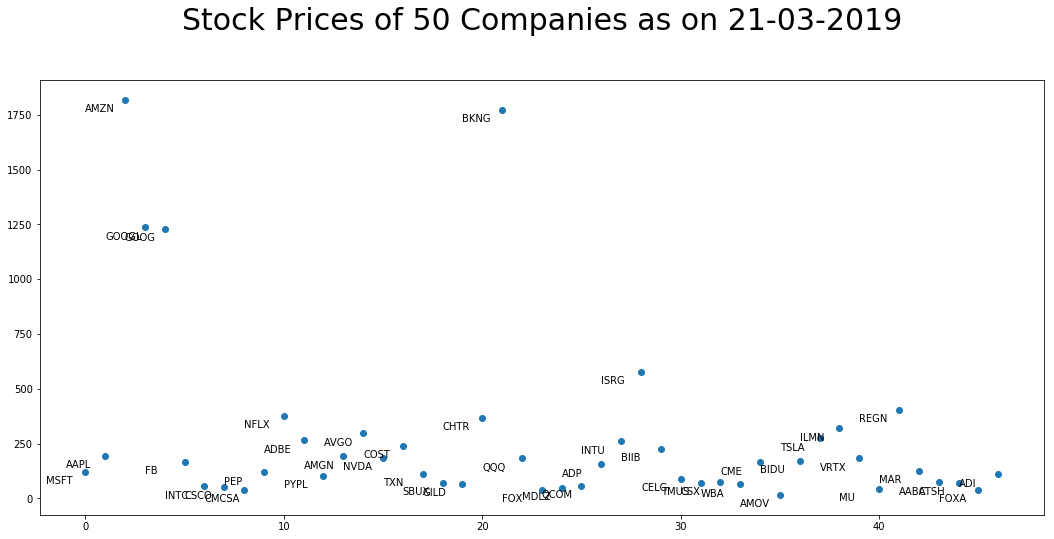

In [5]:
temp = list(range(0,len(name)))
plt.figure(figsize=(18,8))
plt.scatter(temp,price)
rcParams['axes.titlepad'] = 50
for i, txt in enumerate(name):
    #plt.annotate(txt, (temp[i], price[i]),xy=(x+0.5, y+0.05))
    plt.text(temp[i]-2,price[i]-55,txt)
plt.title('Stock Prices of 50 Companies as on '+month+'-'+day+'-'+year,fontsize=30)
plt.show()


## Historical stock price of company

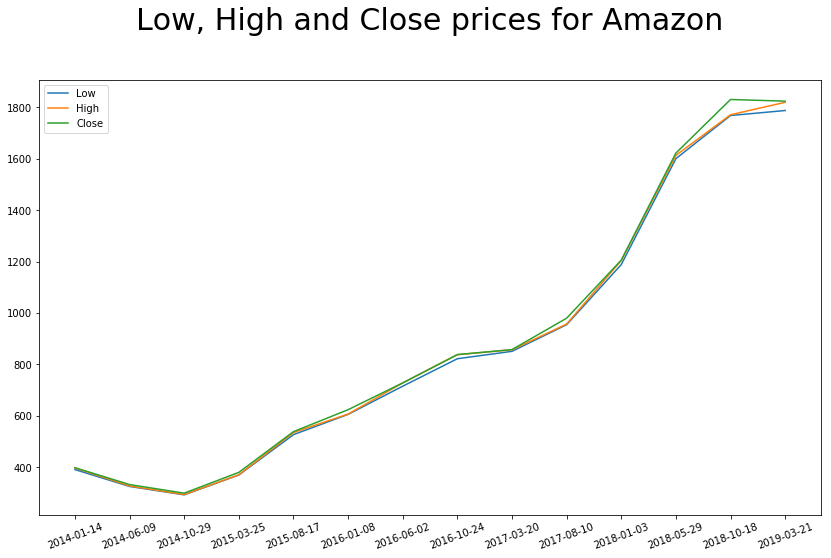

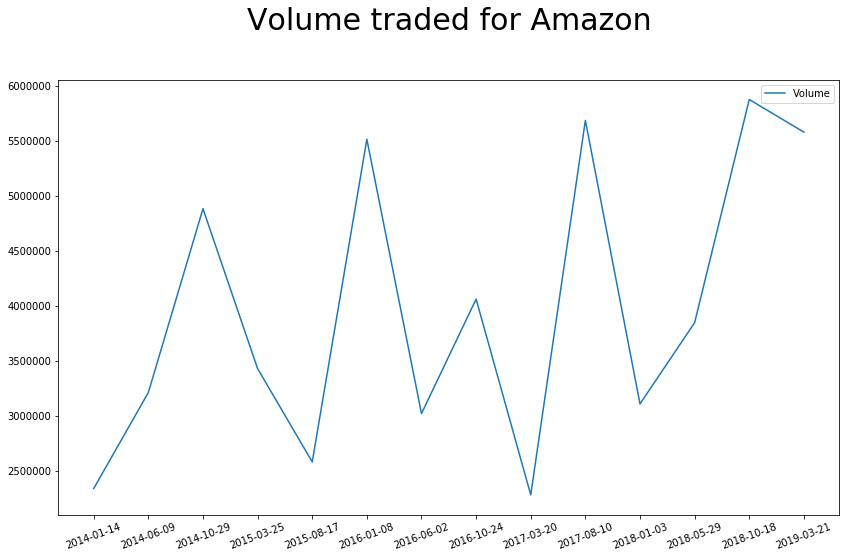

In [6]:
response = requests.get('https://api.unibit.ai/historicalstockprice/AMZN?range=3y&interval=100&AccessKey='+api_key)
hist = response.json()
low=[]
high=[]
close=[]
volume=[]
date=[]
for i in range(0,len(hist['Stock price'])):
    low.append(hist['Stock price'][i]['low'])
    high.append(hist['Stock price'][i]['high'])
    close.append(hist['Stock price'][i]['close'])
    volume.append(hist['Stock price'][i]['volume'])
    date.append(hist['Stock price'][i]['date'])
low.reverse()
high.reverse()
close.reverse()
volume.reverse()
date.reverse()

hist_x = list(range(0,len(low)))
plt.figure(figsize=(14,8))
plt.plot(hist_x,low,label="Low")
plt.plot(hist_x,high,label="High")
plt.plot(hist_x,close,label="Close")
plt.xticks(hist_x, date, rotation=20)
plt.legend()
plt.title("Low, High and Close prices for Amazon",fontsize=30)
plt.show()

plt.figure(figsize=(14,8))
plt.plot(hist_x,volume,label="Volume")
plt.xticks(hist_x, date, rotation=20)
plt.legend()
plt.title("Volume traded for Amazon",fontsize=30)
plt.show()

## Company Financials

In [7]:
profit = {}
for ticker in companies:
    response = requests.get('https://api.unibit.ai/financials/'+ticker+'?type=income_statement&interval=annual&AccessKey='+api_key)
    if(response):
        fin = response.json()
        if(fin!=[] and fin[0]['grossProfit'] != 0 ):
            profit[ticker] = fin[0]['grossProfit']
            
cname=()
gprof=[]
i=0
for key,value in profit.items():
    cname=cname+(key,)
    gprof.append(float(value.replace(',', '')))
    i=i+1;
    if(i==20):
        break;
        

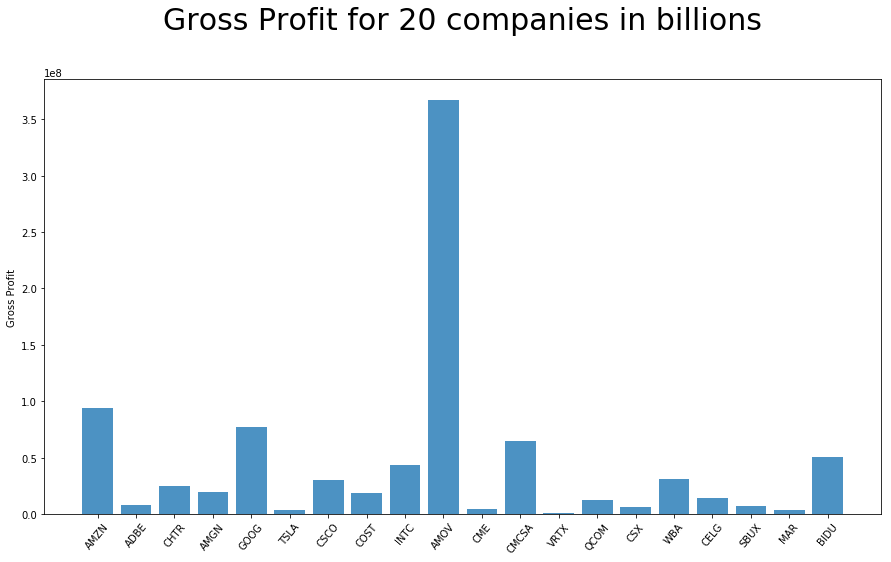

In [8]:

plt.figure(figsize=(15,8))
y_pos = np.arange(len(cname))

 
plt.bar(y_pos, gprof, align='center', alpha=0.8)
plt.xticks(y_pos, cname,rotation=50)
plt.ylabel('Gross Profit')
plt.title('Gross Profit for 20 companies in billions',fontsize=30)
plt.show()